## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
!pip install gym
from gym import spaces
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt


You should consider upgrading via the 'c:\users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Creating env object of the tictactoe class in the environment file 
env = TicTacToe()

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):
    valid_Actions = []
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

#for epsilon
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000001

def epsilon_policy(state,episode):
    
    z = np.random.uniform()
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    
    if z < epsilon:
        possible_agent_actions,possible_env_actions = env.action_space(state)
        action = random.choice(list(possible_agent_actions))
    else:
        # Getting key with maximum value from dictionary which is the action whihc gives the best value for a particular state here
        state_str = Q_state(state)
        action = max(Q_dict[state_str],key=Q_dict[state_str].get)
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
import collections

Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(4,1)),('5-x-x-x-x-x-x-4-x',(1,9)),('x-x-x-x-x-6-5-x-x',(0,9)),('x-x-x-x-6-x-1-x-x',(0,7))]
    
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

#### Define hyperparameters  ---write your code here

In [11]:
#EPISODES = 20
EPISODES = 5000000

#learning rate
LR = 0.01 

#gamma
GAMMA = 0.9

#every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
threshold = 2000  

#every these many episodes, the Q-dict will be updated
policy_threshold = 30000    

### Q-update loop ---write your code here

In [12]:
start_time = time.time()

for episode in range(EPISODES):
    
    #creating an instance of the environment
    env = TicTacToe()
    curr_state_raw = env.state
    add_to_dict(curr_state_raw)

    if episode % 1000000 == 0:
        print("Episode: {}".format(episode))
    
    is_terminal_value = False
    
    while not is_terminal_value:
        
        curr_state = Q_state(curr_state_raw)
        curr_action = epsilon_policy(curr_state_raw,episode)
        
        next_state_raw, reward, is_terminal_value = env.step(curr_state_raw, curr_action)
        
        add_to_dict(next_state_raw)
        
        next_state = Q_state(next_state_raw)
        
        if not is_terminal_value:
            
            #maximum value of action for a state
            next_max_action = max(Q_dict[next_state],key=Q_dict[next_state].get)
            Q_dict[curr_state][curr_action] += LR * (reward + (GAMMA *(Q_dict[next_state][next_max_action])) - (Q_dict[curr_state][curr_action]))        
        else:
            
            Q_dict[curr_state][curr_action] += LR * (reward - (Q_dict[curr_state][curr_action]))   
            
        #updating the current state    
        curr_state_raw = next_state_raw
        
    #TRACKING Q-VALUES
    if (episode == threshold-1):         #Initialising q values to be tracked at the 1999th episode
        initialise_tracking_states()
        
    if ((episode+1) % threshold) == 0:   #Trackin Q values at every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')
        
    #SAVING POLICY
    if ((episode+1) % policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')
print(elapsed_time)

Episode: 0
Episode: 1000000
Episode: 2000000
Episode: 3000000
Episode: 4000000
9776.27390217781


#### Check the Q-dictionary

In [13]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.1321611108664231,
              (0, 3): -1.175055212451804,
              (0, 5): -1.3507080621343577,
              (0, 7): -1.2071823377084783,
              (0, 9): -1.068929555423185,
              (1, 1): -1.3539302745856607,
              (1, 3): -1.3530065556599877,
              (1, 5): -1.352686178853542,
              (1, 7): -1.3543696772376204,
              (1, 9): -1.3550000892117928,
              (2, 1): -1.3557991695826241,
              (2, 3): -1.3567551151295458,
              (2, 5): -1.3546603491215117,
              (2, 7): -1.3540700058601682,
              (2, 9): -1.3495559526099659,
              (3, 1): -1.353683140608765,
              (3, 3): -1.3534435993456218,
              (3, 5): -1.352024340008668,
              (3, 7): -1.352924329243369,
              (3, 9): -1.3533634210885432,
              (4, 1): -1.165195505318195,
              (4, 3): -0.8852720862677419,
              (4, 5): 

In [14]:
len(Q_dict)

2614337

In [15]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
one_best_action = max(Q_dict['8-x-x-6-x-9-3-x-x'],key=Q_dict['8-x-x-6-x-9-3-x-x'].get)
print("One of the best action for state 8-x-x-6-x-9-3-x-x is: {}".format(one_best_action))

One of the best action for state 8-x-x-6-x-9-3-x-x is: (4, 5)


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [16]:
# Write the code for plotting the graphs for state-action pairs tracked

In [17]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(4, 1): [-0.30358678195042627,
               -0.561382498190089,
               -0.7292457404880058,
               -0.8170434816909389,
               -0.890417094436652,
               -0.933031997252136,
               -0.9556482944595237,
               -0.9697275395868004,
               -0.9791286798411115,
               -0.9869862018560287,
               -0.9915527094196926,
               -0.9945716730669136,
               -0.9964764587200908,
               -0.997802982532029,
               -0.9985739101869691,
               -0.9990927423591264,
               -0.9994455592149644,
               -0.9996215638945126,
               -0.9997710438601562,
               -0.9998498827958044,
               -0.9999082607885657,
               -0.9999466842514566,
               -0.9999628702079841,
               -0.9999749103209493,
               -0.9999861333489417,
               -0.9999903430809131,
               -0.99

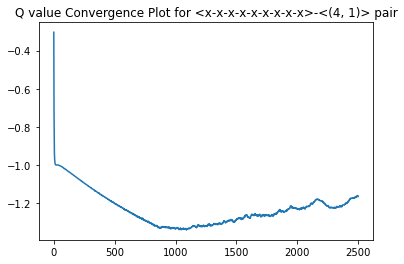

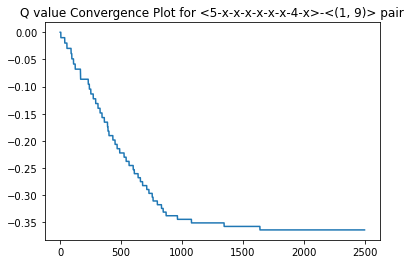

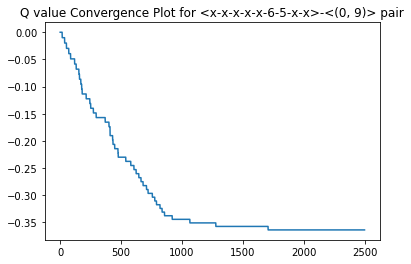

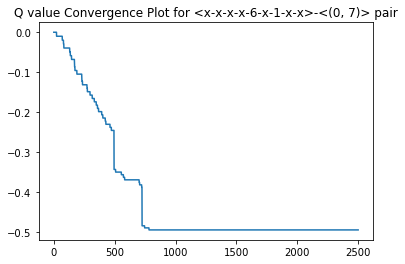

In [18]:
for state,values in States_track.items():
    for action,value in values.items():
        x_axis = np.arange(0,len(States_track[state][action]))
        y_axis = np.asarray(States_track[state][action])
        plt.plot(x_axis,y_axis)
        plt.title("Q value Convergence Plot for <{}>-<{}> pair".format(state,action))
        plt.show()

### Epsilon - decay check

In [19]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

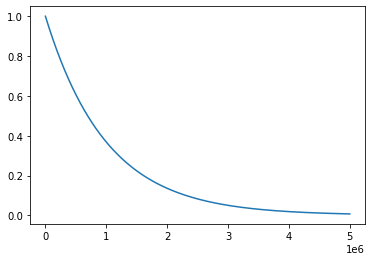

In [20]:
plt.plot(time, epsilon)
plt.show()